# OASISINFOBYTE 

## Task 4
EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import numpy as np#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords') # Downloading the Stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIYAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

### Data description

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

### Visualizing the data

<Axes: xlabel='label'>

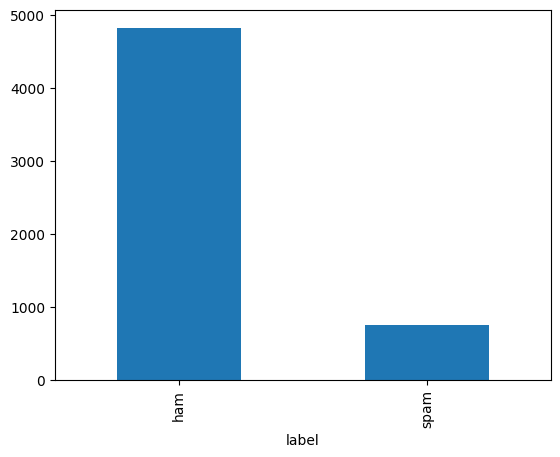

In [8]:
df['label'].value_counts().plot(kind='bar')

### Processing data

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [10]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(df['label'])
Y = Y.iloc[:, 1].values

In [11]:
xtr,xtst,ytr,ytst=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(xtr,ytr)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(xtr, ytr)



DecisionTreeClassifier()

In [13]:
pred1 = model1.predict(xtst)
pred2 = model2.predict(xtst)

### Model Evaluation

In [14]:
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(ytst, pred1))
print("Accuracy: ", accuracy_score(ytst, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(ytst, pred2))
print("Accuracy: ", accuracy_score(ytst, pred2))
print("--------------------------------")

Random Forest Classifier
Confusion Matrix: 
[[965   0]
 [ 27 123]]
Accuracy:  0.9757847533632287
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[959   6]
 [ 21 129]]
Accuracy:  0.9757847533632287
--------------------------------


<Axes: >

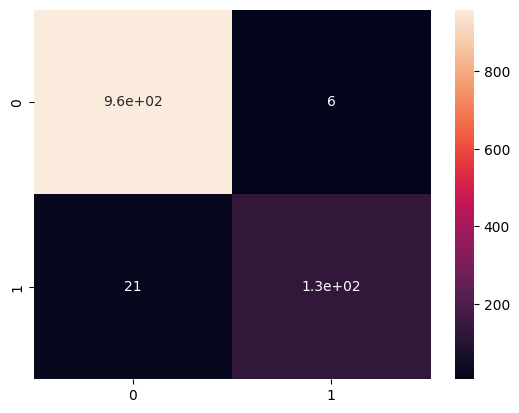

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytst, pred2)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [16]:
result=pd.DataFrame({'Models':['Random Forest Classifier','Decision Tree Classifier'],
                     'Accuracy':[0.977,0.973]})

([0, 1],
 [Text(0, 0, 'Random Forest Classifier'),
  Text(1, 0, 'Decision Tree Classifier')])

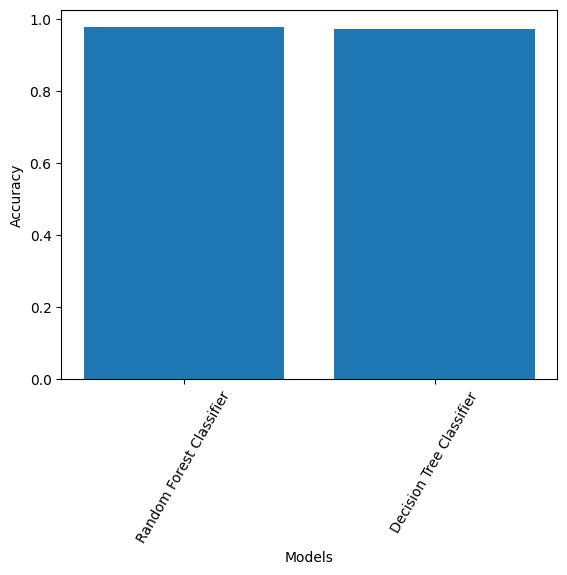

In [17]:
plt.bar(result['Models'],result['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=60)

## The accuracy for both models is almost same. We can use any of them.